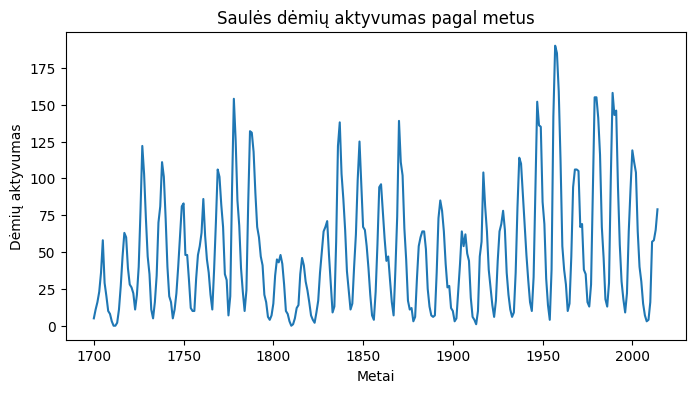

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras import backend as K

data = pd.DataFrame(data=pd.read_table("sunspot.txt",header=None))

data.rename(columns= {0 : 'year', 1: 'activity'}, inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.set_xlabel('Metai')
ax.set_ylabel('Dėmių aktyvumas')
ax.set_title('Saulės dėmių aktyvumas pagal metus')
sns.lineplot(x="year",y="activity", data=data, ax=ax)
plt.show()

In [44]:
L = len(data['activity'])

P1 = data['activity'][1: L-10]
P1.index = list(range(1,len(P1)+1))
P1.rename('P1', inplace=True)

P2 = data['activity'][2: L-9]
P2.index = list(range(1,len(P2)+1))
P2.rename('P2', inplace=True)

P3 = data['activity'][3: L-8]
P3.index = list(range(1,len(P3)+1))
P3.rename('P3', inplace=True)

P4 = data['activity'][4: L-7]
P4.index = list(range(1,len(P4)+1))
P4.rename('P4', inplace=True)

P5 = data['activity'][5: L-6]
P5.index = list(range(1,len(P5)+1))
P5.rename('P5', inplace=True)

P6 = data['activity'][6: L-5]
P6.index = list(range(1,len(P6)+1))
P6.rename('P6', inplace=True)

P7 = data['activity'][7: L-4]
P7.index = list(range(1,len(P7)+1))
P7.rename('P7', inplace=True)

P8 = data['activity'][8: L-3]
P8.index = list(range(1,len(P8)+1))
P8.rename('P8', inplace=True)

P9 = data['activity'][9: L-2]
P9.index = list(range(1,len(P9)+1))
P9.rename('P9', inplace=True)

P10 = data['activity'][10: L-1]
P10.index = list(range(1,len(P10)+1))
P10.rename('P10', inplace=True)

P = pd.concat([P1, P2, P3, P4, P5, P6, P7, P8, P9, P10],axis=1)
T = data['activity'][11: L]
T.index = list(range(1,len(T)+1))

Pu = P[:200]
Tu = T[:200]

Pv = P[200:]
Tv = T[200:]

display(P)

display(T)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
1,11,16,23,36,58,29,20,10,8,3
2,16,23,36,58,29,20,10,8,3,0
3,23,36,58,29,20,10,8,3,0,0
4,36,58,29,20,10,8,3,0,0,2
5,58,29,20,10,8,3,0,0,2,11
...,...,...,...,...,...,...,...,...,...,...
300,119,111,104,64,40,30,15,7,3,4
301,111,104,64,40,30,15,7,3,4,16
302,104,64,40,30,15,7,3,4,16,57
303,64,40,30,15,7,3,4,16,57,58


1       0
2       0
3       2
4      11
5      27
       ..
300    16
301    57
302    58
303    65
304    79
Name: activity, Length: 304, dtype: int64

In [45]:
x = sm.add_constant(Pu)
y = Tu

regression_model = sm.OLS(y,x)

results = regression_model.fit()

print(f"MSE: {results.mse_resid}")
print(results.summary())

MSE: 202.72834469656016
                            OLS Regression Results                            
Dep. Variable:               activity   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     98.40
Date:                Sat, 13 May 2023   Prob (F-statistic):           2.19e-69
Time:                        22:59:28   Log-Likelihood:                -809.32
No. Observations:                 200   AIC:                             1641.
Df Residuals:                     189   BIC:                             1677.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1224      2

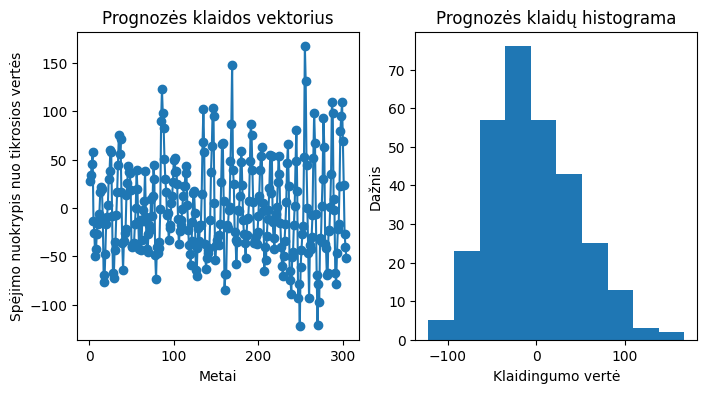

In [46]:
Tr = P1 * -0.6774 + P2 * 1.3723 + 13.4433 - T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(range(1, len(Tr) + 1), Tr, marker='o')
ax[0].set_xlabel('Metai')
ax[0].set_ylabel('Spėjimo nuokrypis nuo tikrosios vertės')
ax[0].set_title('Prognozės klaidos vektorius')

ax[1].hist(Tr)
ax[1].set_xlabel('Klaidingumo vertė')
ax[1].set_ylabel('Dažnis')
ax[1].set_title('Prognozės klaidų histograma')

plt.show()

Weights [b, w1, w2, w3, w4, w5, w6]:
[ 0.01464976  0.09168038  0.09627733  0.0537969   0.00807299  0.01440279
  0.02447055  0.01647103 -0.21460828 -0.12743818  1.0169885 ]
Min MSE (training):
219.41089891656674


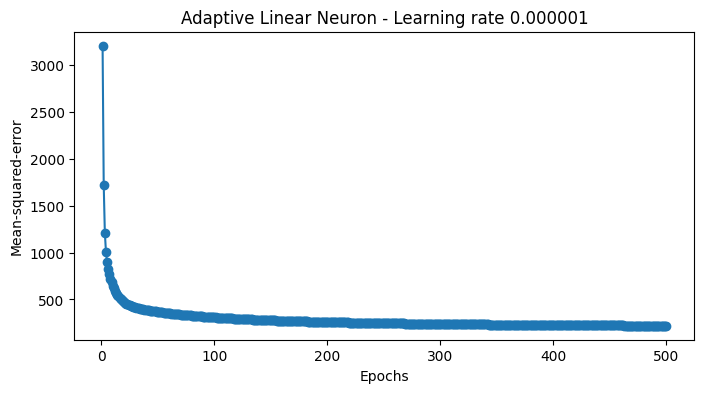

In [47]:
import numpy as np

class AdaptiveLinearNeuron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples]
      """

      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []

      # Cost function
      self.cost = []

      for i in range(self.niter):
         output = self.net_input(X)
         errors = y - output
         self.weight[1:] += self.rate * X.T.dot(errors)
         self.weight[0] += self.rate * errors.sum()
         cost = (errors**2).sum() / len(errors)
         self.cost.append(cost)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(X) >= 0.0, 1, -1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# learning rate = 0.000001
aln1 = AdaptiveLinearNeuron(0.0000001, 500).fit(Pu,Tu)

ax.plot(range(1, len(aln1.cost) + 1), aln1.cost, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean-squared-error')
ax.set_title('Adaptive Linear Neuron - Learning rate 0.000001')

print("Weights [b, w1, w2, w3, w4, w5, w6]:")
print(aln1.weight)
print("Min MSE (training):")
print(min(aln1.cost))

plt.show()

MAD: -17.369215224999998


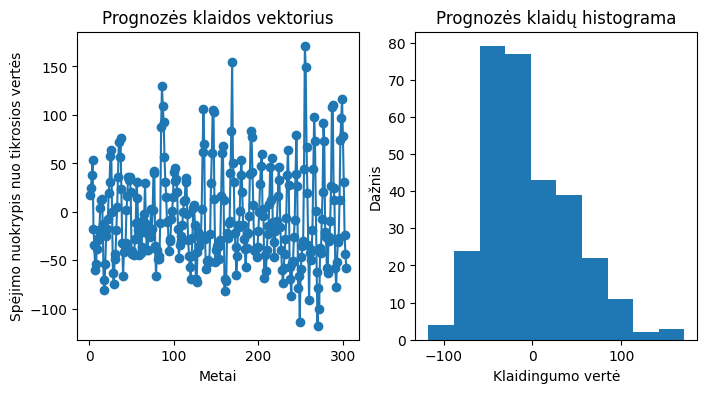

In [48]:
Tr = P1 * -0.58233066 + P2 * 1.46530449 + 0.48029348 - T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(range(1, len(Tr) + 1), Tr, marker='o')
ax[0].set_xlabel('Metai')
ax[0].set_ylabel('Spėjimo nuokrypis nuo tikrosios vertės')
ax[0].set_title('Prognozės klaidos vektorius')

ax[1].hist(Tr)
ax[1].set_xlabel('Klaidingumo vertė')
ax[1].set_ylabel('Dažnis')
ax[1].set_title('Prognozės klaidų histograma')

print("MAD: {coef}".format(coef=np.median(Tr)))

C:\Users\karol\AppData\Local\Temp\ipykernel_38436\2981781314.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


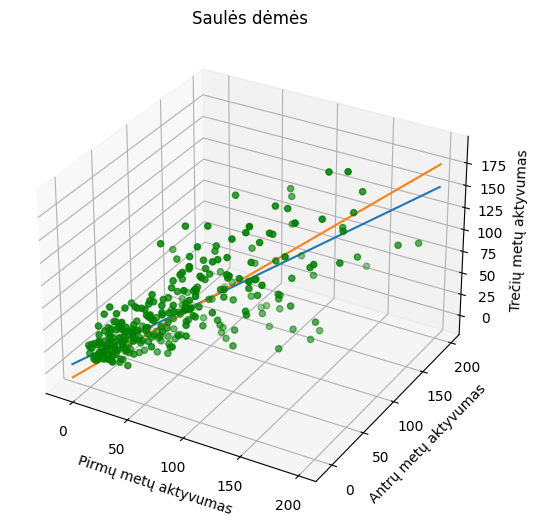

In [49]:
fig = plt.figure()
ax = Axes3D(fig)

plot = ax.scatter(P['P1'],P['P2'],T,color='green')

ax.set_title("Saulės dėmės")
ax.set_xlabel('Pirmų metų aktyvumas')
ax.set_ylabel('Antrų metų aktyvumas')
ax.set_zlabel('Trečių metų aktyvumas')

x_vals = np.array(ax.get_xlim())
y_vals = np.array(ax.get_ylim())
ax.plot(x_vals,y_vals,x_vals*-0.6774 + y_vals*1.3723 + 13.4433) # Regression
ax.plot(x_vals,y_vals,x_vals*-0.56811268 + y_vals*1.45656694 + 0.10245695) # ANN

plt.show()